In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import tensorflow 
%matplotlib inline

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
df = pd.read_csv('spam.csv',delimiter=',',encoding='latin-1')
df.head(10)

FileNotFoundError: ignored

In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.head(10)

NameError: ignored

In [ ]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30, random_state=7)

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [ ]:
def RNN_model():
    inputs = Input(name='inputs',shape=(max_len))
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN_model()
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 150, 50)           50000     
                                                                 
 lstm_2 (LSTM)               (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257 

In [ ]:
history = model.fit(sequences_matrix,Y_train,batch_size=16,epochs=10,validation_split=0.25)

Epoch 1/10
183/183 [==============================] - 17s 91ms/step - loss: 3.7653e-05 - accuracy: 1.0000 - val_loss: 0.1155 - val_accuracy: 0.9877
Epoch 2/10
183/183 [==============================] - 22s 121ms/step - loss: 2.5472e-05 - accuracy: 1.0000 - val_loss: 0.1173 - val_accuracy: 0.9887
Epoch 3/10
183/183 [==============================] - 24s 132ms/step - loss: 2.3684e-05 - accuracy: 1.0000 - val_loss: 0.1198 - val_accuracy: 0.9887
Epoch 4/10
183/183 [==============================] - 22s 121ms/step - loss: 1.4541e-05 - accuracy: 1.0000 - val_loss: 0.1212 - val_accuracy: 0.9887
Epoch 5/10
183/183 [==============================] - 16s 87ms/step - loss: 1.5513e-05 - accuracy: 1.0000 - val_loss: 0.1252 - val_accuracy: 0.9897
Epoch 6/10
183/183 [==============================] - 17s 94ms/step - loss: 1.1899e-05 - accuracy: 1.0000 - val_loss: 0.1257 - val_accuracy: 0.9887
Epoch 7/10
183/183 [==============================] - 17s 92ms/step - loss: 1.2954e-05 - accuracy: 1.0000 - v

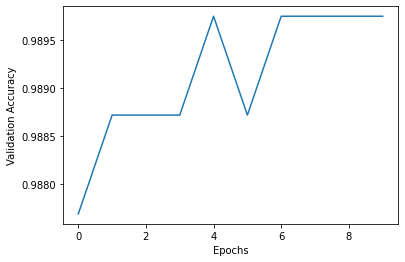

In [ ]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.plot(history.epoch,history.history['val_accuracy'])

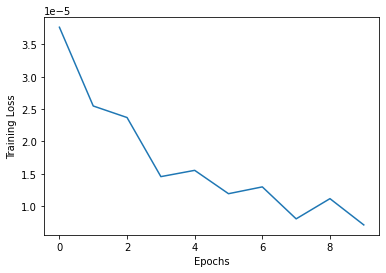

In [ ]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.plot(history.epoch,history.history['loss'])

In [ ]:
model.save('Spam_Detector_model.h5')

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
test_accuracy = model.evaluate(test_sequences_matrix,Y_test)

53/53 [==============================] - 2s 38ms/step - loss: 0.2148 - accuracy: 0.9791


In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
print('Test Loss: {:0.4f} and Test Accuracy: {:0.2f}%'.format(test_accuracy[0],test_accuracy[1]*100))

Test Loss: 0.2148 and Test Accuracy: 97.91%
